# QUESTION 1

In [2]:
# Question 1

import pandas as pd

# Step 2: IMPORTING DATA SET FROM THE URL DIREECTLY
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"
users = pd.read_csv(url, sep="|")
print("-------------------------------------------------------------------------")
# Step 4: MEAN OF AGE PER OCCUPATION 
mean_age_by_occupation = users.groupby("occupation")["age"].mean()
print("-------------------------------------------------------------------------")
# Step 5: RATI OF MALE BY OCUUPATION 
def male_ratio(group):
    male_count = (group['gender'] == 'M').sum()
    total_count = group['gender'].count()
    return male_count / total_count

male_ratio_by_occupation = users.groupby("occupation").apply(male_ratio)
male_ratio_by_occupation = male_ratio_by_occupation.sort_values(ascending=False)
print("------------------------------------------------------------------------------------------")
# Step 6: MIMUM VALUE AND MAXIMUM VALUE BY AGE OCUUPATION
age_range_by_occupation = users.groupby("occupation")["age"].agg(['min', 'max'])
print("-------------------------------------------------------------------------------------------")
# Step 7: MEAN AGE PER COMBAINE OCUPPATION AND SEX
mean_age_by_occupation_sex = users.groupby(["occupation", "gender"])["age"].mean()
print("-------------------------------------------------------------------------")
# Step 8: PERCENTAGE OF MEN AND WOMEN BY OCUPPUTION
def gender_percentage(group):
    total_count = group['gender'].count()
    female_count = (group['gender'] == 'F').sum()
    male_count = total_count - female_count
    return {
        'female_percentage': (female_count / total_count) * 100,
        'male_percentage': (male_count / total_count) * 100
    }

gender_percentage_by_occupation = users.groupby("occupation").apply(gender_percentage)
print("-----------------------------------------------------------------------------------------")
# Print the results
print("Mean Age per Occupation:")
print(mean_age_by_occupation)
print("-------------------------------------------------------------------------")
print("\nMale Ratio per Occupation (sorted):")
print(male_ratio_by_occupation)
print("-------------------------------------------------------------------------")
print("\nMinimum and Maximum Ages per Occupation:")
print(age_range_by_occupation)
print("-------------------------------------------------------------------------")
print("\nMean Age per Occupation and Sex:")
print(mean_age_by_occupation_sex.unstack())
print("-------------------------------------------------------------------------")
print("\nPercentage of Women and Men per Occupation:")
print(gender_percentage_by_occupation)

-------------------------------------------------------------------------
-------------------------------------------------------------------------
------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
-------------------------------------------------------------------------
-----------------------------------------------------------------------------------------
Mean Age per Occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist 

# QUESTION 2

In [4]:
# Question 2

import pandas as pd

# Import the dataset form url
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Selecting  only the Goal column first
goals = euro12["Goals"]

# select Number of teams participated from the  
num_teams = euro12["Team"].nunique()

# Select Number of columns in the dataset
num_columns = euro12.shape[1]

# Selecting perticlar columns into a new dataframe
discipline = euro12[["Team", "Yellow Cards", "Red Cards"]]

# Sort the teams by Red Cards, then by Yellow Cards
discipline_sorted = discipline.sort_values(by=["Red Cards", "Yellow Cards"])

# Mean of Yellow Cards by Team
mean_yellow_cards = discipline["Yellow Cards"].mean()

# Filter teams having scored more than 6 goals
high_scoring_teams = euro12[euro12["Goals"] > 6]

# Selecting  teams which name start with 'G'
teams_starting_with_G = euro12[euro12["Team"].str.startswith("G")]

# Select the first 7 columns
first_seven_columns = euro12.iloc[:, :7]

# Select all columns apart from  the last 3
all_except_last_three = euro12.iloc[:, :-3]

# Having Accuracy for the specific countries
shooting_accuracy = euro12.loc[euro12["Team"].isin(["England", "Italy", "Russia"]), ["Team", "Shooting Accuracy"]]

# Print the results
print("Number of teams participated teams:", num_teams)
print(" Select Number of columns in the dataset:", num_columns)
print("\nDiscipline DataFrame:")
print(discipline)
print("-------------------------------------------------------------------------")
print("\nDiscipline DataFrame sorted:")
print(discipline_sorted)
print("-------------------------------------------------------------------------")
print("\nMean Yellow Cards per Team:", mean_yellow_cards)
print("\nTeams that scored more than 6 goals:")
print(high_scoring_teams)
print("-------------------------------------------------------------------------")
print("\nTeams starting with 'G':")
print(teams_starting_with_G)
print("-------------------------------------------------------------------------")
print("\nFirst 7 columns:")
print(first_seven_columns)
print("-------------------------------------------------------------------------")
print("\nAll columns except the last 3:")
print(all_except_last_three)
print("-------------------------------------------------------------------------")
print("\nShooting Accuracy for England, Italy, and Russia:")
print(shooting_accuracy)
print("-------------------------------------------------------------------------")


---------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------
------------------------------------------------------------

# QUESTION 3

In [5]:
# Question 3

import pandas as pd
import numpy as np

# Step 2
series1 = pd.Series(np.random.randint(1, 5, size=100))
series2 = pd.Series(np.random.randint(1, 4, size=100))
series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# Step 3
df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})

# Step 4
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], ignore_index=True))

# Step 6
print("-------------------------------------------------------------------------")
print("Is it true that 'bigcolumn' only goes until index 99?", bigcolumn.index.max() == 99)

# Step 7
bigcolumn.reset_index(drop=True, inplace=True)

# Verify the reindexing
print("-------------------------------------------------------------------------")
print("Is it true after reindexing?", bigcolumn.index.max() == 299)



-------------------------------------------------------------------------
Is it true that 'bigcolumn' only goes until index 99? False
-------------------------------------------------------------------------
Is it true after reindexing? True


# QUESTION 4

In [18]:
# Question 4

import pandas as pd
import numpy as np

# Step 1: Importing the necessary libraries

# Importing  the dataset from the given file wind.txt
data = pd.read_csv('wind.txt', delim_whitespace=True, na_values='NaN')

# Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data['date'] = pd.to_datetime(data[['Yr', 'Mo', 'Dy']].astype(str).agg('-'.join, axis=1))
data = data.set_index('date')
data = data.drop(['Yr', 'Mo', 'Dy'], axis=1)

# Create a function to fix the year
def fix_year(year):
    if year > 1989:
        return year - 100
    else:
        return year

data.index = data.index.map(lambda x: x.replace(year=fix_year(x.year)))

# Set up the right date for the index
data.index = pd.to_datetime(data.index)

# Compute how many values are missing for each location over the entire record
missing_values = data.isnull().sum()

# Compute how many non-missing values there are in total
non_missing_count = data.count().sum()

# Calculate the mean windspeeds of the windspeeds over all the locations and all the times
mean_windspeed = data.mean().mean()

# Create a DataFrame called loc_stats and calculate statistics for each location
loc_stats = pd.DataFrame({
    'min': data.min(),
    'max': data.max(),
    'mean': data.mean(),
    'std': data.std()
})

# Create a DataFrame called day_stats and calculate statistics for each day
day_stats = pd.DataFrame({
    'min': data.min(axis=1),
    'max': data.max(axis=1),
    'mean': data.mean(axis=1),
    'std': data.std(axis=1)
})

# Find the average windspeed in January for each location
average_january = data[data.index.month == 1].mean()

# Downsample the record to a yearly frequency for each location
yearly_data = data.resample('Y').mean()

# Downsample the record to a monthly frequency for each location
monthly_data = data.resample('M').mean()

# Downsample the record to a weekly frequency for each location
weekly_data = data.resample('W').mean()

# Calculate statistics for each week
weekly_stats = weekly_data.rolling(window=7).agg(['min', 'max', 'mean', 'std']).dropna()

print("Missing values:\n", missing_values)
print("------------------------------------------------------------------------------")
print("Non-missing values count:", non_missing_count)
print("-----------------------------------------------------------------------------------")
print("Mean windspeed over all locations and times:", mean_windspeed)
print("------------------------------------------------------------------------------------")
print("Location statistics:\n", loc_stats)
print("-------------------------------------------------------------------------------------")
print("Day statistics:\n", day_stats)
print("---------------------------------------------------------------------------------------")
print("Average windspeed in January for each location:\n", average_january)
print("---------------------------------------------------------------------------------------")
print("Yearly downsampled data:\n", yearly_data)
print("-----------------------------------------------------------------------------------")
print("Monthly downsampled data:\n", monthly_data)
print("----------------------------------------------------------------------------------")
print("Weekly downsampled data:\n", weekly_data)
print("-------------------------------------------------------------------------------------")
print("Weekly statistics:\n", weekly_stats)
print("--------------------------------------------------------------------------------------")


Missing values:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
------------------------------------------------------------------------------
Non-missing values count: 78857
-----------------------------------------------------------------------------------
Mean windspeed over all locations and times: 10.227982360836938
------------------------------------------------------------------------------------
Location statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794
--

# QUESTION 5 

In [13]:
# Question 5

# Step 1: Import the necessary libraries
import pandas as pd

# Step 2: Import the dataset from the chipotle.tsv file
chipo = pd.read_csv('chipotle.tsv', sep='\t')
print("-------------------------------------------------------------------------")
# Step 3: Assign it to a variable called chipo

# Step 4: Show the first 10 entries form the chipo.tsv
print(chipo.head(10))
print("-------------------------------------------------------------------------")
# Step 5: What are the total number of observations in the dataset?
num_observations = len(chipo)
print("Number of observations:", num_observations)
print("-------------------------------------------------------------------------")
# Step 6: total numbe of columns
num_columns = len(chipo.columns)
print("Number of columns:", num_columns)
print("-------------------------------------------------------------------------")
# Step 7: Print the name of columns
print("Columns:", chipo.columns.tolist())
print("-------------------------------------------------------------------------")
# Step 8
print("Index:", chipo.index)
print("-------------------------------------------------------------------------")
# Step 9
most_ordered_item = chipo['item_name'].value_counts().idxmax()
print("Most-ordered item:", most_ordered_item)
print("-------------------------------------------------------------------------")
# Step 10 what are items that were ordered?
most_ordered_item_quantity = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("Quantity ordered for the most-ordered item:", most_ordered_item_quantity)
print("-------------------------------------------------------------------------")
# Step 11: What was the most ordered item in the choice_description column?
most_ordered_choice_description = chipo['choice_description'].value_counts().idxmax()
print("Most ordered choice description:", most_ordered_choice_description)
print("-------------------------------------------------------------------------")
# Step 12: How many items that were ordered in total form the file of chipo.tsv?
total_ordered_items = chipo['quantity'].sum()
print("Total ordered items:", total_ordered_items)
print("-------------------------------------------------------------------------")
# Step 13:
# Convert the item price to a float
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
print("-------------------------------------------------------------------------")
# Check the item price type
print("Item price type:", chipo['item_price'].dtype)
print("-------------------------------------------------------------------------")
# Step 14
total_revenue = (chipo['quantity'] * chipo['item_price']).sum()
print("Total revenue:", total_revenue)
print("-------------------------------------------------------------------------")
# Step 15
num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)
print("-------------------------------------------------------------------------")
# Step 16
average_revenue_per_order = total_revenue / num_orders
print("Average revenue per order:", average_revenue_per_order)
print("-------------------------------------------------------------------------")
# Step 17
num_different_items = chipo['item_name'].nunique()
print("Number of different items sold:", num_different_items)
print("-------------------------------------------------------------------------")

-------------------------------------------------------------------------
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                      

# QUESTION 6

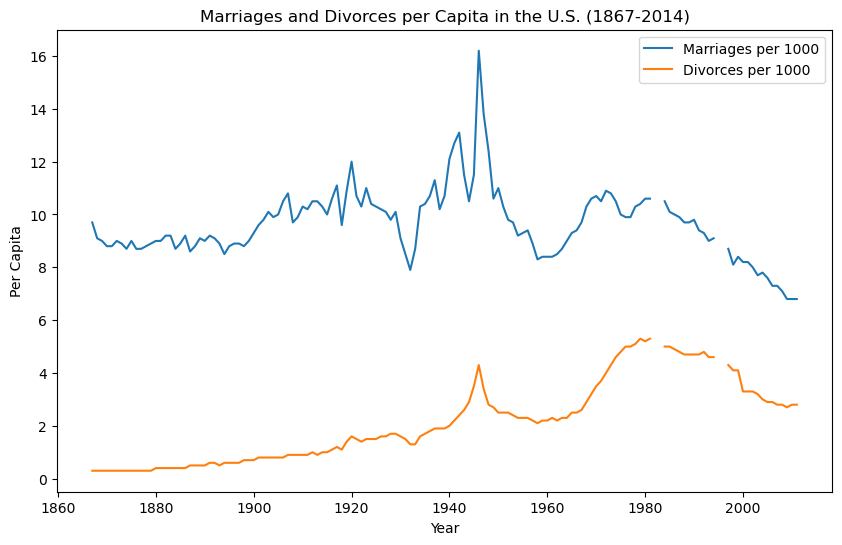

In [14]:
# Question 6

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset from the us-marriages-divorces-1867-2014.csv file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Step 2: Creating a line plot
plt.figure(figsize=(10, 6))

# draw maragges per capita
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per 1000')

# draw divorces per capita
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per 1000')

# Add all labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')

# Add legend as well
plt.legend()

# Show the plot
plt.show()


# QUESTION 7

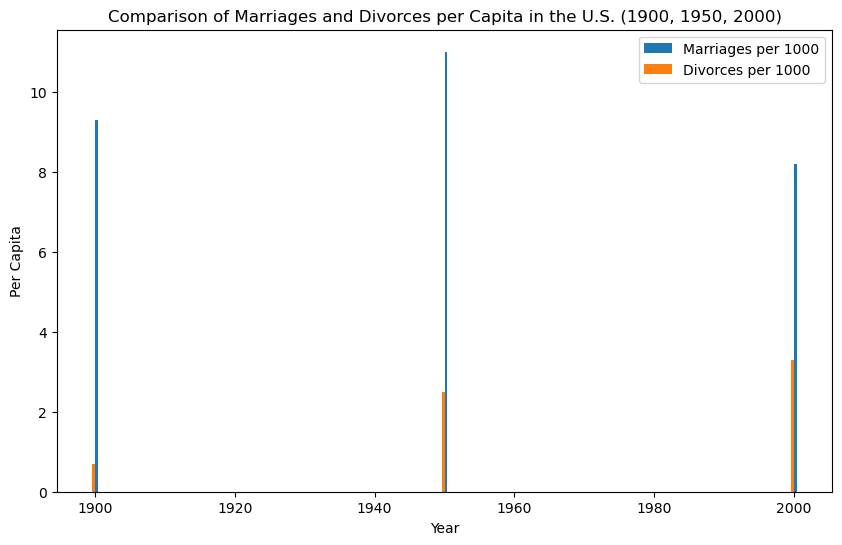

In [15]:
# Question 7

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Importing  the dataset from the us-marriages-divorces-1867-2014.csv file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Filter data for  1900, 1950, and 2000
years = [1900, 1950, 2000]
filtered_data = data[data['Year'].isin(years)]

# Step 2 create bar chart
plt.figure(figsize=(10, 6))

# draw marriages and divorces per capita for the year 1900,1950,2000
plt.bar(filtered_data['Year'], filtered_data['Marriages_per_1000'], width=0.4, align='edge', label='Marriages per 1000')
plt.bar(filtered_data['Year'], filtered_data['Divorces_per_1000'], width=-0.4, align='edge', label='Divorces per 1000')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita')
plt.title('Comparison of Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')

# Add legend
plt.legend()

# Show the plot
plt.show()


# QUESTION 8

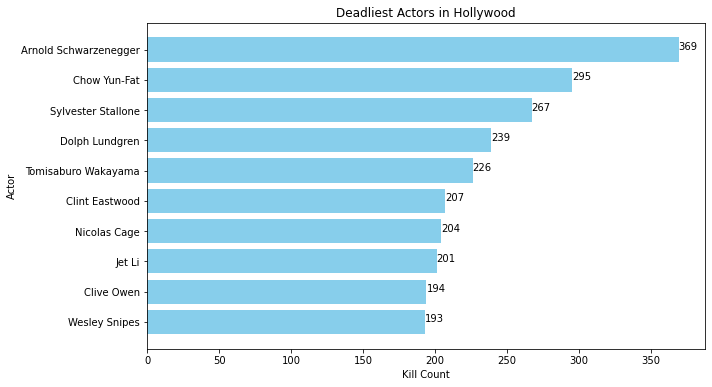

In [5]:
# Question 8

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset from the actor_kill_counts.csv file
data = pd.read_csv('actor_kill_counts.csv')

# Step 2: Sort the data by kill count
sorted_data = data.sort_values(by='Count', ascending=True)

# Step 3: Create a horizontal bar chart
plt.figure(figsize=(10, 6))

# Plot horizontal bars
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')

# Add labels and title
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Display actor names on each bar
for index, value in enumerate(sorted_data['Count']):
    plt.text(value, index, str(value))

# Show the plot
plt.show()


# QUESTION 9

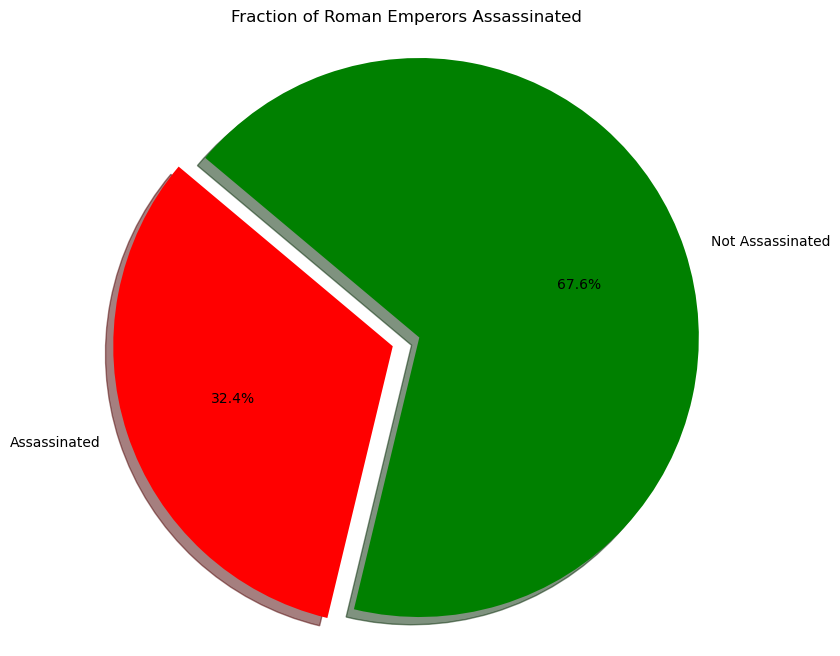

In [16]:
# Question 9

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Importing the dataset from the roman-emperor-reigns.csv file
data = pd.read_csv('roman-emperor-reigns.csv')

# Step 2: 
assassinated_count = data[data['Cause_of_Death'].str.contains('Assassinated')].shape[0]
not_assassinated_count = data.shape[0] - assassinated_count

# Step 3: Create a pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]
colors = ['red', 'green']
explode = (0.1, 0)  # crate the first slice (Assassinated)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Equal to makeusre that pie is drawn as a circle.
plt.axis('equal')

# Add title
plt.title('Fraction of Roman Emperors Assassinated')

# Show the plot
plt.show()


# QUESTION 10

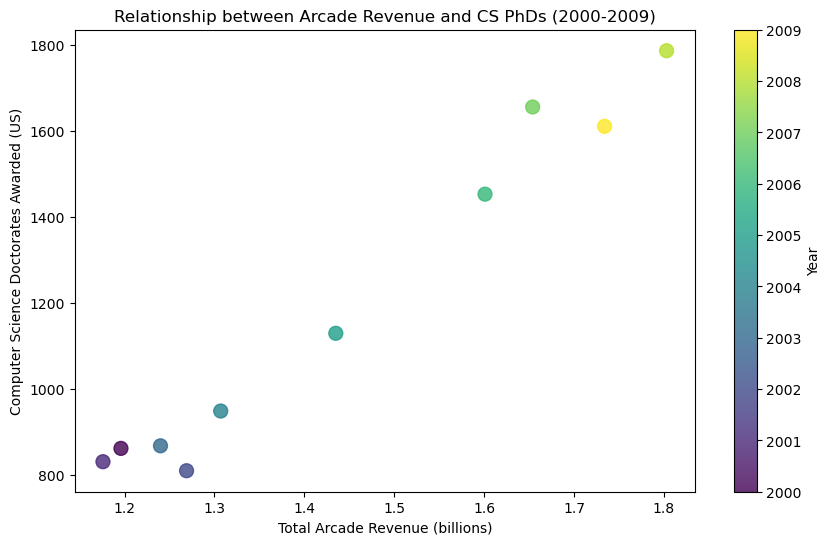

In [17]:
# Question 10
# imporitng necessary libraries for this 
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset from the arcade-revenue-vs-cs-doctorates.csv file
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Step 2: draw scatter plot
plt.figure(figsize=(10, 6))

# Plot scatter plot
plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'],
            c=data['Year'], cmap='viridis', s=100, alpha=0.8)

# Add labels and title
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS PhDs (2000-2009)')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Year')

# Show the plot
plt.show()
